In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [23]:
data_dir_path = os.path.join('data')
data_files = os.listdir(data_dir_path)

data_files

['running', 'idle', '.DS_Store', 'walking', 'stairs']

In [24]:
sample_activity_dir = os.path.join(data_dir_path, 'walking')
sample_files = os.listdir(sample_activity_dir)

sample_files[:5]

['walking-576.csv',
 'walking-210.csv',
 'walking-204.csv',
 'walking-1429.csv',
 'walking-562.csv']

In [25]:
sample_file_path = os.path.join(sample_activity_dir, 'walking-1.csv')
df = pd.read_csv(sample_file_path)

df.head()

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,2.322376,3.643975,11.827356
1,1.781286,4.668694,6.148310
2,7.963115,-4.113238,1.359907
3,1.996764,-1.398214,1.163582
4,5.185841,-12.143391,4.687847


In [26]:
def load_data_from_directory(directory, label):
    files = os.listdir(directory)
    data_list = []
    for file in files:
        file_path = os.path.join(directory, file)
        data = pd.read_csv(file_path)
        data['Activity'] = label
        data_list.append(data)
    return pd.concat(data_list, ignore_index=True)


In [27]:
activities = ['idle', 'running', 'stairs', 'walking']
data_frames = []
for activity in activities:
    directory_path = os.path.join('data', activity)
    df = load_data_from_directory(directory_path, activity)
    data_frames.append(df)

complete_data = pd.concat(data_frames, ignore_index=True)

complete_data.shape, complete_data.head()

((193860, 4),
    accelerometer_X  accelerometer_Y  accelerometer_Z Activity
 0         0.009577         5.937620         7.570466     idle
 1         0.086191         6.555324         7.785944     idle
 2         0.004788         6.440403         7.139510     idle
 3         0.277727         6.430826         7.690176     idle
 4        -0.047884         6.239290         7.340623     idle)

In [29]:
def extract_time_features(data):
    features = {
        'mean_X': data['accelerometer_X'].mean(),
        'std_X': data['accelerometer_X'].std(),
        'median_X': data['accelerometer_X'].median(),
        'max_X': data['accelerometer_X'].max(),
        'mean_Y': data['accelerometer_Y'].mean(),
        'std_Y': data['accelerometer_Y'].std(),
        'median_Y': data['accelerometer_Y'].median(),
        'max_Y': data['accelerometer_Y'].max(),
        'mean_Z': data['accelerometer_Z'].mean(),
        'std_Z': data['accelerometer_Z'].std(),
        'median_Z': data['accelerometer_Z'].median(),
        'max_Z': data['accelerometer_Z'].max()
    }
    return pd.Series(features)

# Групування даних по часових мітках
time_features = complete_data.groupby(complete_data.index // 200).apply(extract_time_features)
time_features['Activity'] = complete_data.groupby(complete_data.index // 200)['Activity'].first().values
time_features.reset_index(drop=True, inplace=True)

In [30]:
scaler = StandardScaler()


In [31]:
features = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']
complete_data[features] = scaler.fit_transform(complete_data[features])

complete_data

,accelerometer_X,accelerometer_Y,accelerometer_Z,Activity
0,-0.227723,0.347865,0.801712,idle
1,-0.218607,0.397385,0.831675,idle
2,-0.228292,0.388172,0.741787,idle
3,-0.195818,0.387404,0.818358,idle
4,-0.234559,0.372049,0.769752,idle
...,...,...,...,...
193855,-0.452192,-0.883975,-0.598540,walking
193856,-1.429830,-1.235984,-0.416767,walking
193857,-0.338248,-0.290895,2.896430,walking
193858,-0.204934,-1.132723,-0.197707,walking


In [32]:
X = complete_data.drop('Activity', axis=1)
y = complete_data['Activity']



In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
svc_clf = SVC(kernel='linear', random_state=42)
svc_clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [35]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred_svc = svc_clf.predict(X_test)
print(classification_report(y_test, y_pred_svc))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

        idle       0.81      0.77      0.79     10212
     running       0.85      0.85      0.85     33652
      stairs       0.00      0.00      0.00      1672
     walking       0.77      0.86      0.81     18438

    accuracy                           0.82     63974
   macro avg       0.61      0.62      0.61     63974
weighted avg       0.80      0.82      0.81     63974



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
y_pred_r = randomForest.predict(X_test)
print(classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00     10212
     running       1.00      1.00      1.00     33652
      stairs       1.00      0.99      0.99      1672
     walking       1.00      1.00      1.00     18438

    accuracy                           1.00     63974
   macro avg       1.00      1.00      1.00     63974
weighted avg       1.00      1.00      1.00     63974



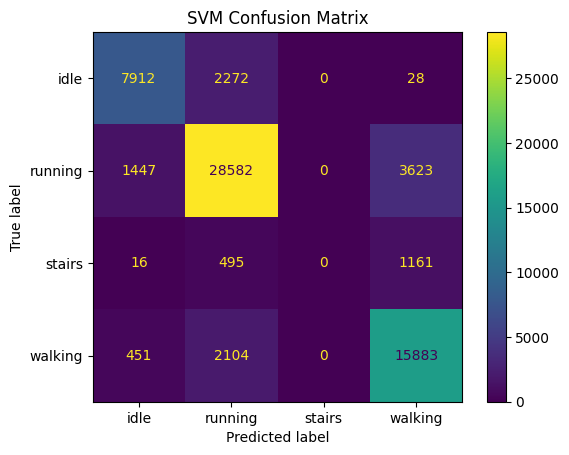

In [40]:
# SVM Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_clf.classes_)
disp_svc.plot()
plt.title("SVM Confusion Matrix")
plt.show()

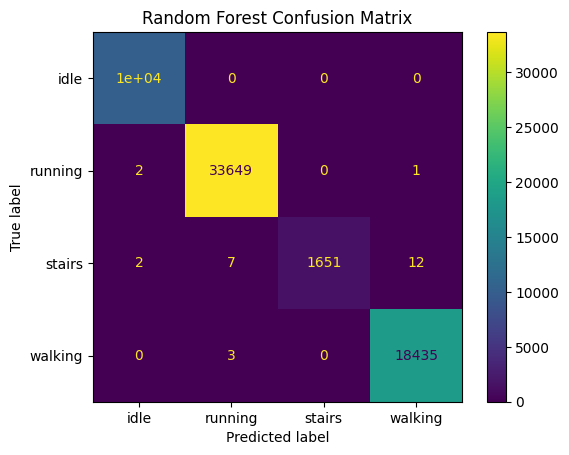

In [41]:
cm_rf = confusion_matrix(y_test, y_pred_r)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=randomForest.classes_)
disp_rf.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()